In [1]:
from larch import Interpreter
session = Interpreter()
import larch
from larch import io
from larch import xafs
from larch.io import read_ascii
from larch.xafs import pre_edge
from larch.xafs import mback

import matplotlib.pyplot as plt
import numpy as np

In [2]:
#txtファイルの場合、labelがないため、第1列をenergy, 第2列(μt)をmuとする
dat = io.read_ascii("658_Pt-L1_PtO2_Si111_50ms_150611.txt", labels="energy mu")

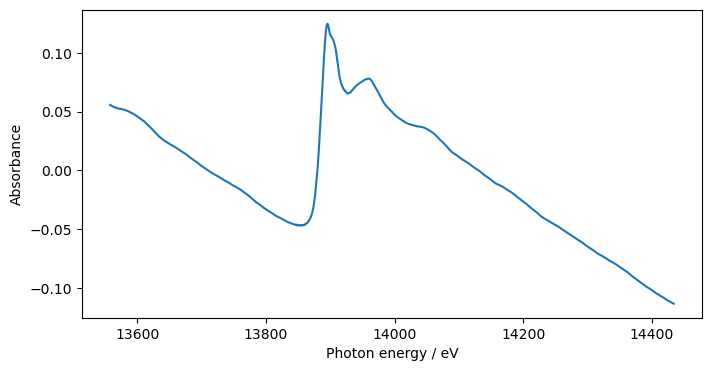

In [3]:
###ただの測定結果です。###
###フーリエ変換前のデータです。###

fig = plt.figure(figsize=(8, 4))
plt.plot(dat.energy, dat.mu)
#plt.plot(dat.e0, dat.mu[dat.energy == dat.e0], 'o', color='r')
plt.xlabel("Photon energy / eV")
plt.ylabel("Absorbance")
plt.show()

In [4]:
###以下のコードで、バッググラウンド除去や規格化を自動的に行える###
larch.xafs.pre_edge(dat, _larch=session)

In [5]:
##pre_edgeモジュールでできること##

#e0 → 吸収端(μtの一次微分の最初のピーク)

#edge_step → Δμ(吸収端のジャンプの値) 規格化前のものなので使わない

#dmude → dμ/dE (array)

#norm → normalized mu(E) (array) μtを規格化した値

#flat → flattened, normalized mu(E) (array)
#吸収端より高エネルギー側について，規格化されたスペクトルからプレエッジの線とポストエッジの線の差分を差し引いた値
#normを使うか、flatを使うかはどちらでも良い。
#しかし、Athenaはflatを推奨している

#edge → ○○吸収端 (○には、L1や Kなど)

#pre_edge → pre-edge curve (array) 吸収端前の領域

#post_edge → post-edge curve (array) 吸収端後の領域

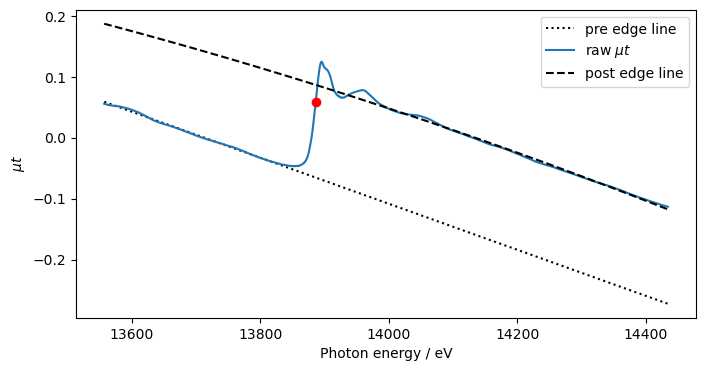

In [6]:
###バックグランド除去・規格化後でないと実行できません###

fig = plt.figure(figsize=(8, 4))
plt.plot(dat.energy, dat.pre_edge, linestyle=":", color="k", label="pre edge line")
plt.plot(dat.energy, dat.mu, label="raw $\mu t$")
plt.plot(dat.e0, dat.mu[dat.energy == dat.e0], 'o', color='r')
plt.plot(dat.energy, dat.post_edge,linestyle="--", color="k", label="post edge line")
plt.xlabel("Photon energy / eV"); plt.ylabel("$\mu t$"); plt.legend()
plt.show()

In [7]:
print('e0(吸収端)は', dat.e0)
print('edge_stepは', dat.edge_step)
print('edgeの種類は', dat.edge)

e0(吸収端)は 13886.318471
edge_stepは 0.15216651341525456
edgeの種類は L1


In [8]:
print('dμ/dEは')
print(dat.dmude)

dμ/dEは
[ 5.00308801e-04  8.58053723e-04  1.54297726e-03  1.66735081e-03
  1.20767566e-03  8.03790959e-04  5.09151241e-04  1.18278008e-04
 -1.07422775e-04 -5.80140107e-04 -1.07077560e-03 -1.17039170e-03
 -1.29634542e-03 -8.27017918e-04 -6.55889408e-05  2.13056442e-04
  3.43499315e-04  2.82218546e-04  1.08377020e-04  1.70410750e-04
 -1.30206363e-04 -2.38558413e-04 -5.13410766e-05 -2.66529320e-04
 -1.49208696e-04  5.45857071e-05  7.76740997e-05  3.70497444e-04
  4.28062595e-04  3.19273528e-04  4.32126312e-04  3.30196568e-04
  3.41095166e-04  4.49898808e-04  7.15166674e-05 -1.40059255e-04
 -3.29753255e-04 -6.64084766e-04 -3.62289472e-04 -1.52979188e-04
 -1.12059030e-04  1.55883037e-04  1.44353211e-04  3.25612134e-04
  6.37468660e-04  5.38351227e-04  7.85057457e-04  1.18780552e-03
  1.23147534e-03  1.29465240e-03  2.63620392e-03  1.56127303e-03
 -7.66884003e-04  3.52733693e-03  7.03670833e-03 -1.34442929e-03
 -2.62403399e-03  5.52161455e-03  2.27436110e-03  1.96497920e-03
  3.13262386e-03  

In [9]:
print('規格化μtは')
print(dat.norm)

規格化μtは
[-2.08936723e-02 -1.78252579e-02 -1.08237632e-02  6.88036995e-05
  8.96146836e-03  1.41010396e-02  1.85111391e-02  2.01795142e-02
  1.98890115e-02  1.88916304e-02  1.30150874e-02  6.35591052e-03
 -9.72067229e-04 -8.71730955e-03 -1.08563265e-02 -9.52381628e-03
 -8.36200616e-03 -5.44397737e-03 -4.94412959e-03 -4.15553662e-03
 -2.87793095e-03 -5.68006484e-03 -5.67395721e-03 -6.31092993e-03
 -8.79343343e-03 -8.06544723e-03 -8.11885251e-03 -7.12177551e-03
 -3.65064147e-03 -1.98033622e-03  2.02711605e-04  3.33640029e-03
  4.13558584e-03  7.38209526e-03  9.61181532e-03  8.23335730e-03
  7.91566176e-03  4.18264820e-03  4.63321829e-07 -2.49492885e-04
 -1.87090248e-03 -1.61409935e-03  8.96166559e-05  1.09779113e-04
  3.95073315e-03  8.06737179e-03  1.05287569e-02  1.77287599e-02
  2.35047826e-02  2.53999806e-02  2.62499558e-02  2.79171019e-02
  2.75053942e-02  2.74288829e-02  2.97510944e-02  3.19090495e-02
  2.88950761e-02  3.02382090e-02  3.25036334e-02  3.18008770e-02
  3.39196623e-02  

In [10]:
print('規格化・畳み込みμtは')
print(dat.flat)

規格化・畳み込みμtは
[-2.08936723e-02 -1.78252579e-02 -1.08237632e-02  6.88036995e-05
  8.96146836e-03  1.41010396e-02  1.85111391e-02  2.01795142e-02
  1.98890115e-02  1.88916304e-02  1.30150874e-02  6.35591052e-03
 -9.72067229e-04 -8.71730955e-03 -1.08563265e-02 -9.52381628e-03
 -8.36200616e-03 -5.44397737e-03 -4.94412959e-03 -4.15553662e-03
 -2.87793095e-03 -5.68006484e-03 -5.67395721e-03 -6.31092993e-03
 -8.79343343e-03 -8.06544723e-03 -8.11885251e-03 -7.12177551e-03
 -3.65064147e-03 -1.98033622e-03  2.02711605e-04  3.33640029e-03
  4.13558584e-03  7.38209526e-03  9.61181532e-03  8.23335730e-03
  7.91566176e-03  4.18264820e-03  4.63321829e-07 -2.49492885e-04
 -1.87090248e-03 -1.61409935e-03  8.96166559e-05  1.09779113e-04
  3.95073315e-03  8.06737179e-03  1.05287569e-02  1.77287599e-02
  2.35047826e-02  2.53999806e-02  2.62499558e-02  2.79171019e-02
  2.75053942e-02  2.74288829e-02  2.97510944e-02  3.19090495e-02
  2.88950761e-02  3.02382090e-02  3.25036334e-02  3.18008770e-02
  3.39196623e

In [11]:
print('吸収端前の規格化前μtは')
print(dat.pre_edge)

吸収端前の規格化前μtは
[ 0.05891932  0.05660041  0.05448201  0.05221553  0.04999536  0.04782229
  0.04550322  0.04330835  0.04109856  0.03877533  0.03661854  0.03434884
  0.03209992  0.02995248  0.02758097  0.02530321  0.02315442  0.02081239
  0.01857533  0.01631733  0.01399092  0.01189032  0.00955939  0.00724431
  0.00513407  0.00279829  0.00046142 -0.0017953  -0.00409849 -0.00633666
 -0.00866185 -0.01098869 -0.0131653  -0.01547331 -0.0177676  -0.01997384
 -0.0223465  -0.02461846 -0.02685307 -0.02924404 -0.03147831 -0.03384839
 -0.03623364 -0.0383637  -0.04071717 -0.04308358 -0.04533712 -0.04773672
 -0.04946764 -0.05009203 -0.05026936 -0.05045305 -0.0505734  -0.05069376
 -0.05081412 -0.05093449 -0.05105486 -0.05117524 -0.05130196 -0.05143503
 -0.05157444 -0.05172653 -0.05188496 -0.05204341 -0.05220187 -0.05227793
 -0.05235399 -0.05249979 -0.05265193 -0.05279141 -0.05293089 -0.05307038
 -0.05322255 -0.05337474 -0.05353328 -0.05360938 -0.05368548 -0.0538377
 -0.05398992 -0.05412947 -0.05426902 -0

In [12]:
print('吸収端後の規格化前μtは')
print(dat.post_edge)

吸収端後の規格化前μtは
[ 0.18713762  0.18541825  0.18384247  0.18215115  0.18048901  0.17885698
  0.17710965  0.17545056  0.17377491  0.17200756  0.1703616   0.16862405
  0.1668969   0.16524259  0.16340986  0.16164386  0.15997272  0.1581456
  0.15639484  0.1546222   0.15279009  0.15113077  0.14928394  0.14744385
  0.14576152  0.14389378  0.14201925  0.14020341  0.13834451  0.13653259
  0.13464449  0.13274919  0.13097096  0.12907979  0.12719414  0.1253755
  0.1234138   0.12152965  0.11967103  0.11767639  0.11580688  0.11381784
  0.11180993  0.11001163  0.10801903  0.10600942  0.10409004  0.10204023
  0.10055776  0.1000222   0.09987001  0.09971234  0.09960901  0.09950567
  0.0994023   0.09929891  0.09919551  0.09909208  0.09898318  0.09886882
  0.09874899  0.09861822  0.09848198  0.0983457   0.09820938  0.09814394
  0.09807849  0.09795302  0.09782206  0.09770198  0.09758188  0.09746175
  0.09733066  0.09719955  0.09706293  0.09699735  0.09693175  0.09680054
  0.09666929  0.09654895  0.09642858  0.

In [13]:
###energyとflatのデータ数が同じかどうか確かめる###

print(len(dat.energy))
print(len(dat.flat))

468
468


In [14]:
####energyと規格後flatデータを新たに作る###

combined_list = list(zip(dat.energy, dat.flat))
combined_list

[(13557.383751, -0.020893672312262874),
 (13563.516792, -0.017825257923409027),
 (13569.119507, -0.010823763183672789),
 (13575.113892, 6.880369953028897e-05),
 (13580.985775, 0.008961468360303718),
 (13586.733101, 0.014101039561640119),
 (13592.866564, 0.01851113914854927),
 (13598.671547, 0.02017951416134191),
 (13604.516002, 0.019889011466389234),
 (13610.660474, 0.018891630354319778),
 (13616.364733, 0.013015087398507081),
 (13622.367614, 0.006355910520240025),
 (13628.315565, -0.0009720672292544009),
 (13633.995086, -0.008717309546871615),
 (13640.267252, -0.010856326532155203),
 (13646.291469, -0.009523816283825414),
 (13651.974574, -0.008362006161727128),
 (13658.168753, -0.005443977365197901),
 (13664.085318, -0.004944129594851844),
 (13670.057258, -0.004155536615224602),
 (13676.210132, -0.0028779309501103362),
 (13681.765812, -0.0056800648445609545),
 (13687.930642, -0.005673957212643199),
 (13694.053538, -0.006310929926501136),
 (13699.634706, -0.008793433428648531),
 (13705

In [15]:
combined_list = list(zip(dat.energy, dat.flat))

# テキストファイルにデータを書き込む
with open('output.txt', 'w') as file:
    for item in combined_list:
        file.write(f'{item[0]}\t{item[1]}\n')